In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
df=pd.read_csv("/Users/manvithanandyala/Downloads/gender_classification.csv")

In [81]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [6]:
df.shape

(5001, 8)

In [9]:
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [10]:
df.isnull().sum()
#no missing values

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [11]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


<AxesSubplot:ylabel='Frequency'>

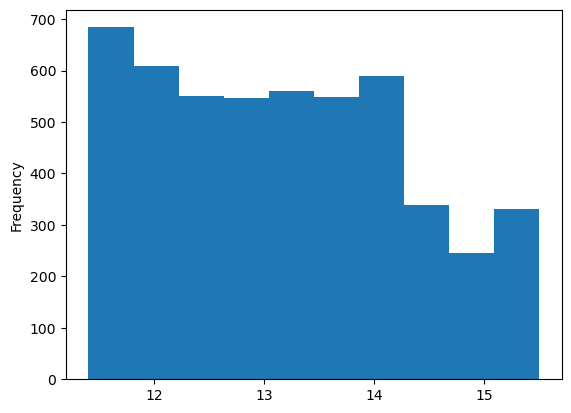

In [13]:
df['forehead_width_cm'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

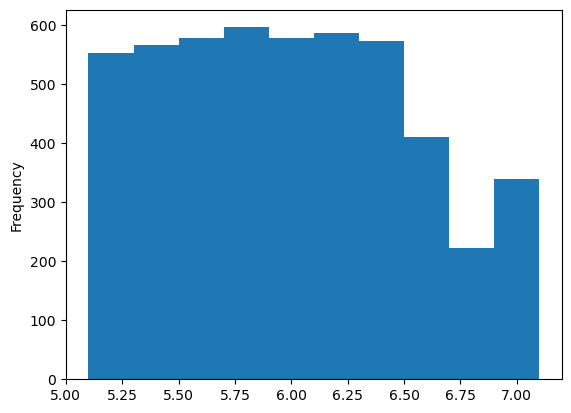

In [14]:
df['forehead_height_cm'].plot.hist()

<AxesSubplot:>

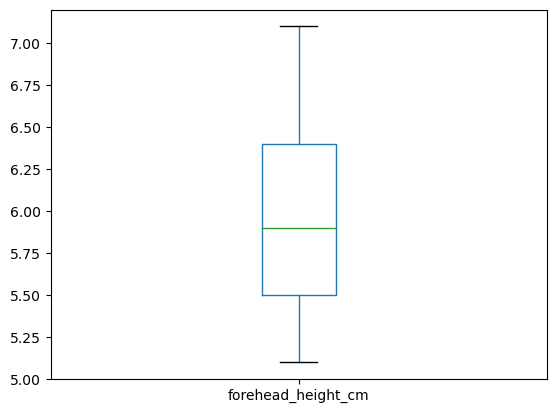

In [16]:
df['forehead_height_cm'].plot.box()

<AxesSubplot:>

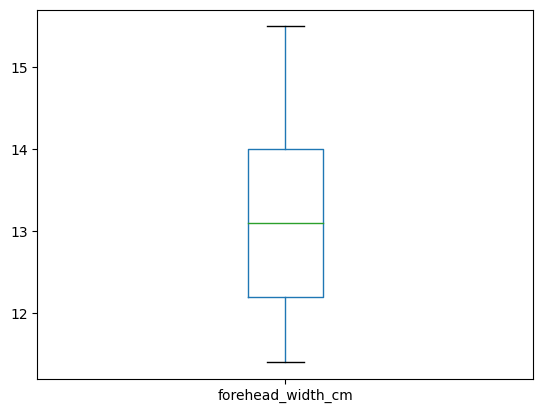

In [18]:
df['forehead_width_cm'].plot.box()

In [21]:
df['gender'].value_counts()/len(df['gender'])

Female    0.5001
Male      0.4999
Name: gender, dtype: float64

<AxesSubplot:>

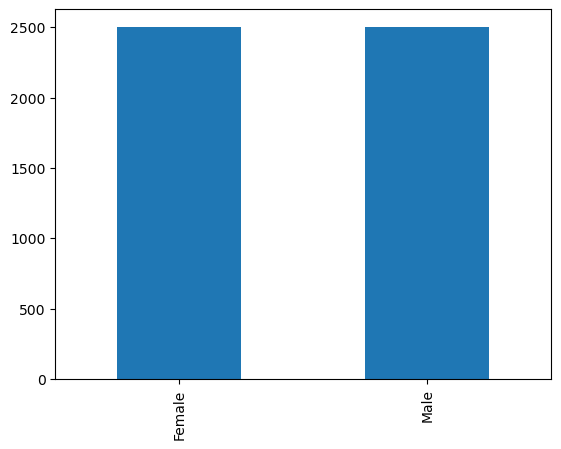

In [25]:
df['gender'].value_counts().plot.bar()

In [26]:
#bivarient analysis

df.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000


<AxesSubplot:>

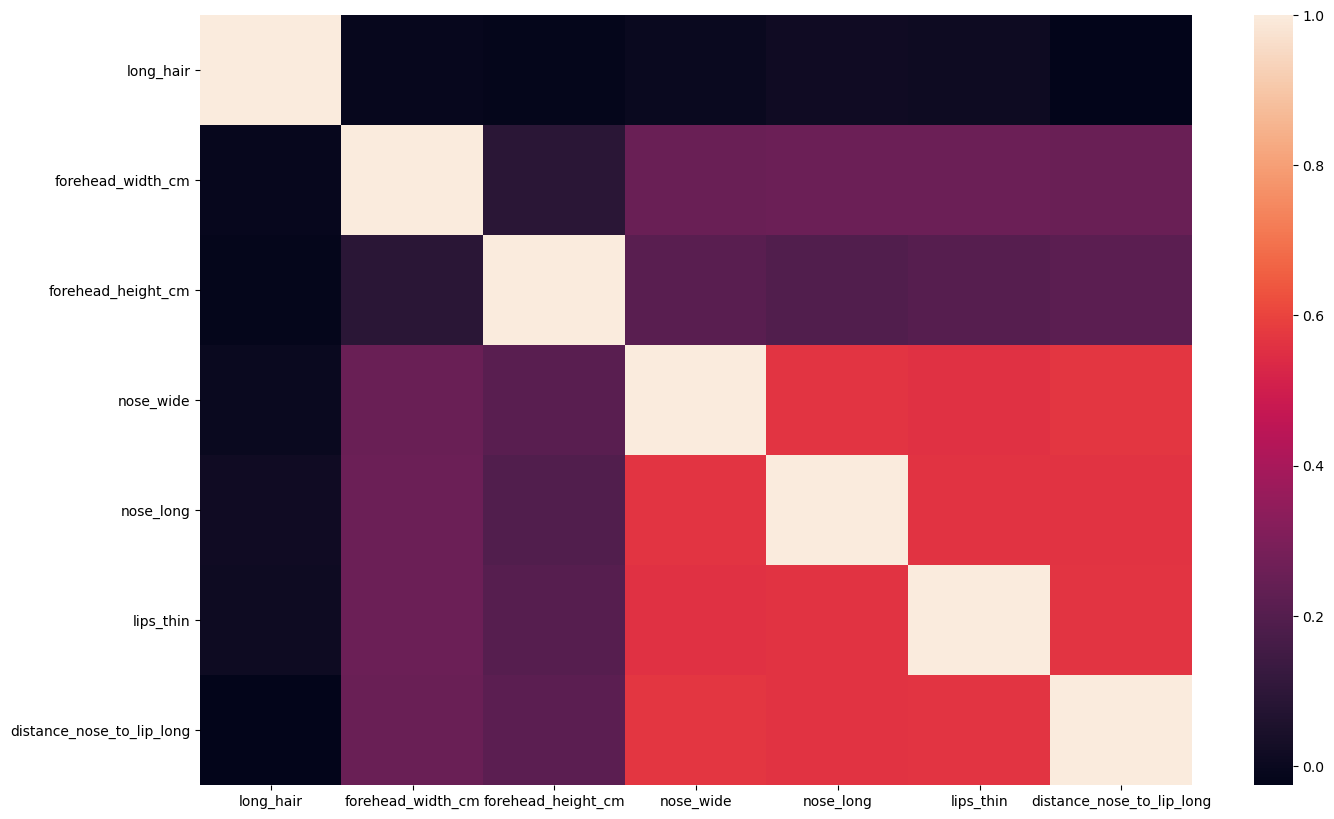

In [32]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr())

In [82]:
#model building

df['gender'].replace('Male', 0,inplace=True)
df['gender'].replace('Female', 1,inplace=True)

In [83]:
df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1
5,1,13.0,6.8,1,1,1,1,0
6,1,15.3,6.2,1,1,1,0,0
7,0,13.0,5.2,0,0,0,0,1
8,1,11.9,5.4,1,0,1,1,1
9,1,12.1,5.4,0,0,0,0,1


In [84]:
x=df.drop(['gender'],axis=1)
y=df['gender']

In [79]:
x.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [41]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: gender, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=12)

In [44]:
x_train.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
4858,1,13.3,6.0,0,0,1,0
2537,1,13.5,5.8,0,0,0,0
24,0,14.2,5.3,0,0,0,0
2481,0,12.3,5.2,0,0,0,1
688,1,12.2,6.4,0,1,0,0


In [45]:
y_train.head()

4858    1
2537    1
24      1
2481    1
688     1
Name: gender, dtype: int64

In [46]:
x_test.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
2226,1,11.5,5.9,1,1,1,1
1273,1,12.9,6.5,1,1,0,1
357,1,12.7,6.6,1,1,1,1
478,1,13.2,6.0,0,0,0,0
356,0,11.6,6.2,0,0,0,0


In [47]:
y_test.head()

2226    0
1273    0
357     0
478     1
356     1
Name: gender, dtype: int64

In [48]:
from sklearn.linear_model import LogisticRegression
lrg=LogisticRegression()

In [49]:
lrg.fit(x_train,y_train)

LogisticRegression()

In [52]:
p=lrg.predict(x_test)
print(p)

[0 0 0 ... 0 0 1]


In [51]:
y_test

2226    0
1273    0
357     0
478     1
356     1
       ..
4170    1
3194    0
2444    0
1069    0
2909    1
Name: gender, Length: 1001, dtype: int64

In [53]:
lrg.score(x_test,y_test)

0.964035964035964

In [54]:
#here the evaluation metric is accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test, p)

0.964035964035964

In [55]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt=DecisionTreeClassifier()

In [58]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
pd=dt.predict(x_test)
print(pd)

[0 0 0 ... 0 0 1]


In [62]:
y_test

2226    0
1273    0
357     0
478     1
356     1
       ..
4170    1
3194    0
2444    0
1069    0
2909    1
Name: gender, Length: 1001, dtype: int64

In [63]:
dt.score(x_test,y_test)

0.962037962037962

In [64]:
accuracy_score(y_test,pd)

0.962037962037962

In [65]:
final_pred=p

In [66]:
print(final_pred)

[0 0 0 ... 0 0 1]


In [72]:
submission = pd.DataFrame()

In [73]:
submission['Gender']=final_pred

In [74]:
submission.head(10)

,Gender
0,0
1,0
2,0
3,1
4,1
5,1
6,1
7,1
8,0
9,1


In [85]:
submission['Gender'].replace(0,'Male',inplace=True)
submission['Gender'].replace(1,'Female',inplace=True)

In [86]:
submission.head(10)

,Gender
0,Male
1,Male
2,Male
3,Female
4,Female
5,Female
6,Female
7,Female
8,Male
9,Female


In [77]:
submission.to_csv('submission3.csv', header=True, index=False)